### House Price Prediction 

This regression problem tries to predict house prices and is based on the Kaggle dataset available here:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
from sklearn.cluster import MiniBatchKMeans
import pickle

import ml_functions as dp


#Import dataset
dataset_df = pd.read_csv('train.csv')


def plot_relplot(df,x,y):
    
    sns.relplot(x=x,y=y,
    data=df,aspect=1,height=5)
    
    plt.show()




### Exploratory Data Analysis (EDA)

The goal of EDA is to understand and visualize the dataset and find correlations in the data.

In [2]:


#Explore the data types
print(dataset_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [3]:
#understand feature data types
print(dataset_df.get_dtype_counts())



float64     3
int64      35
object     43
dtype: int64


In [4]:
#preview the data
print(dataset_df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008     

In [5]:
#Display columns with missing data  
dp.display_missing_colrows(dataset_df,0)

Columns with missing data:
    feature/index  miss count  miss ratio
72        PoolQC        1453    0.995205
74   MiscFeature        1406    0.963014
6          Alley        1369    0.937671
73         Fence        1179    0.807534
57   FireplaceQu         690    0.472603
3    LotFrontage         259    0.177397
58    GarageType          81    0.055479
59   GarageYrBlt          81    0.055479
60  GarageFinish          81    0.055479
63    GarageQual          81    0.055479
64    GarageCond          81    0.055479
32  BsmtExposure          38    0.026027
35  BsmtFinType2          38    0.026027
33  BsmtFinType1          37    0.025342
31      BsmtCond          37    0.025342
30      BsmtQual          37    0.025342
26    MasVnrArea           8    0.005479
25    MasVnrType           8    0.005479
42    Electrical           1    0.000685


In [6]:
#Display rows with missing data  
dp.display_missing_colrows(dataset_df,1)

Rows with missing data:
       feature/index  miss count  miss ratio
39               39          15    0.010274
1011           1011          15    0.010274
1218           1218          15    0.010274
533             533          15    0.010274
1179           1179          14    0.009589
705             705          14    0.009589
520             520          14    0.009589
1143           1143          11    0.007534
1035           1035          11    0.007534
1030           1030          11    0.007534
342             342          11    0.007534
1321           1321          11    0.007534
375             375          11    0.007534
287             287          11    0.007534
386             386          10    0.006849
646             646          10    0.006849
102             102          10    0.006849
1219           1219          10    0.006849
1323           1323          10    0.006849
1326           1326          10    0.006849
1232           1232          10    0.006849
125    

In [7]:
#display categorical features
print(dataset_df.dtypes[dataset_df.dtypes=='object'])


MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

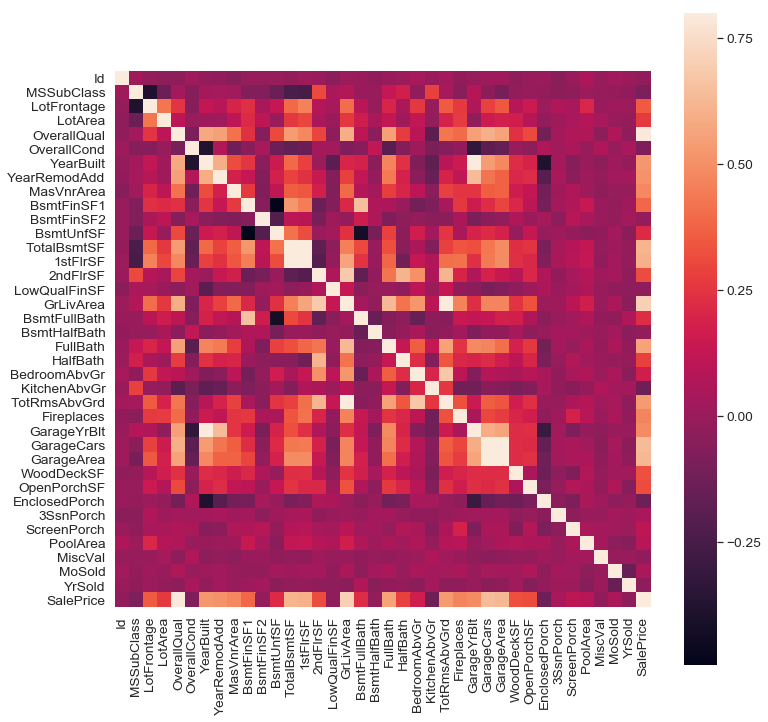

In [16]:
#Plot correlation matrix
dp.plot_heatmap(dataset_df,0.8)






#### Observations from heatmap above:

1) Sale price (last column) has strong correlation (lighter areas)  with OverallQual,GrLivArea,GarageArea. We will explore this in more detail later. 

2) Features that are almost identical (white areas) - We can remove one from each set and still preserve the information. 

       a) GarageArea and GarageCars 
   
       b) GarageYrBlt and YearBuilt
       
       c) TotalBsmtSF and 1stFlrSF
       
       d) GrLivArea and TotRmsAbvGrd

In [9]:
#Add features with similarity to be removed later
cols_to_remove = ['GarageCars','GarageYrBlt','TotalBsmtSF','TotRmsAbvGrd']

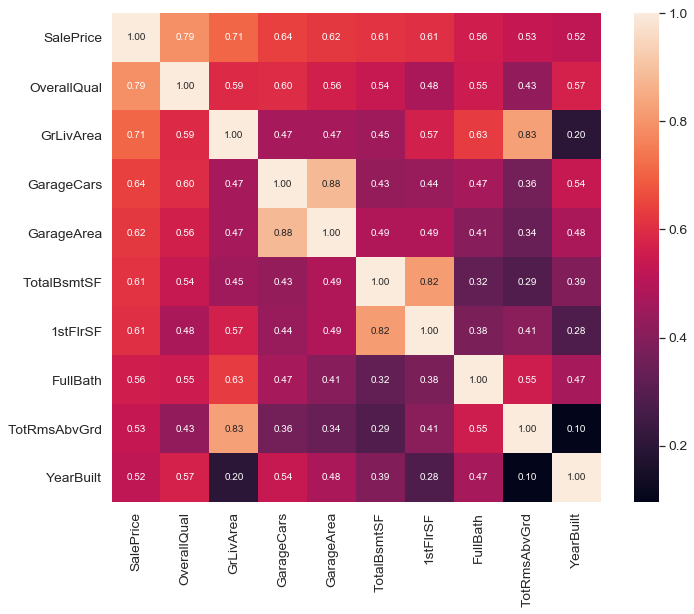

In [10]:
#saleprice correlation matrix
#define top/bottom n features we want to look at vs target variable
n = 10
target = 'SalePrice'

#Plot features with highest correlation to target
highcorr_cols = dp.plot_tb_heatmap(dataset_df,target,n,'largest')


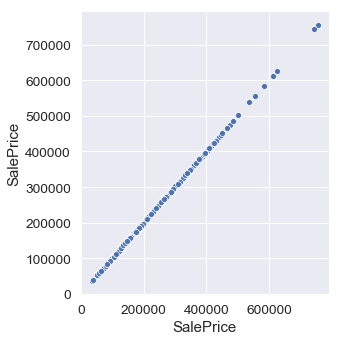

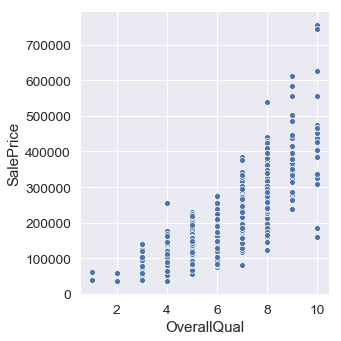

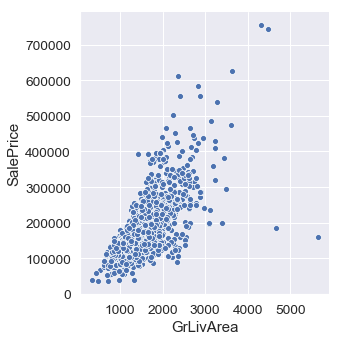

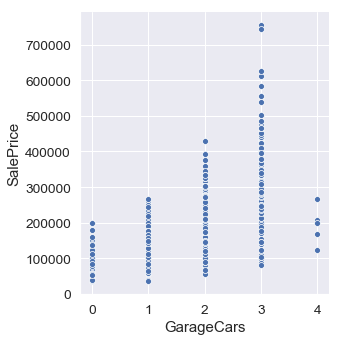

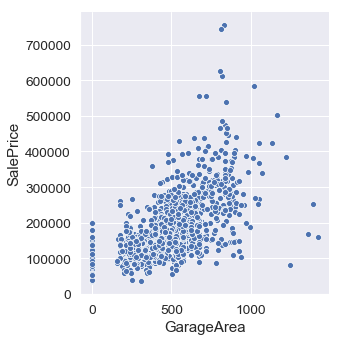

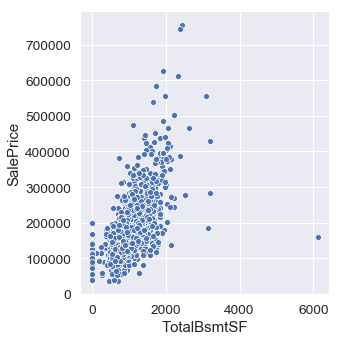

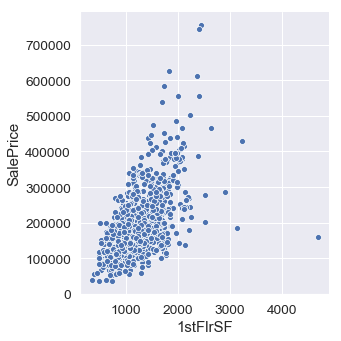

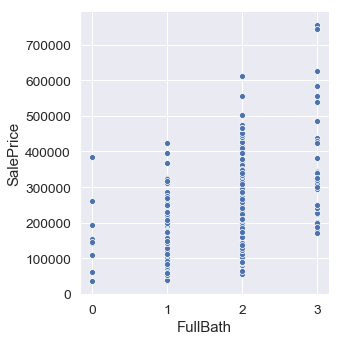

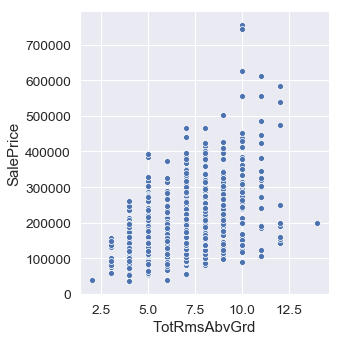

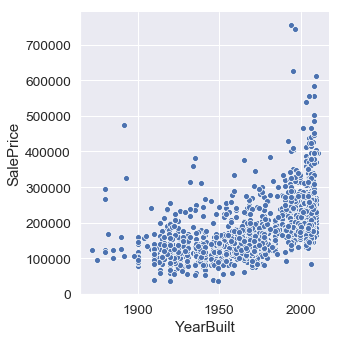

In [11]:
for cols in highcorr_cols:
    plot_relplot(dataset_df,cols,target)
    

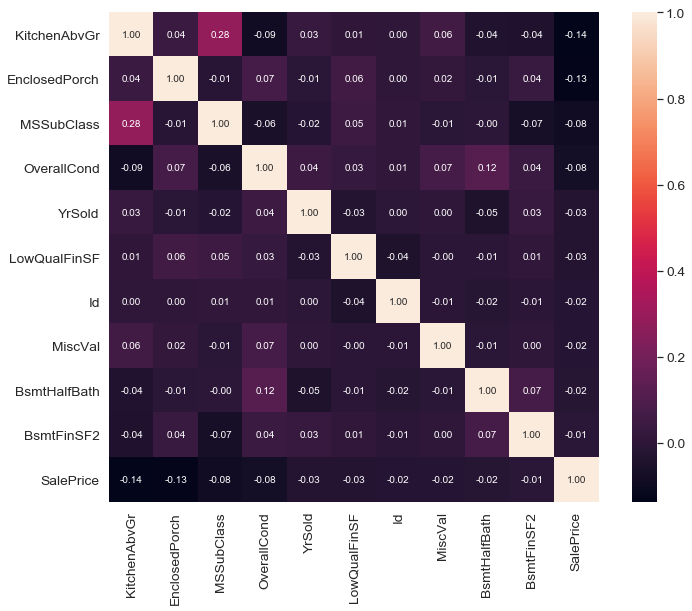

In [12]:
#Plot features with lowest correlation to target    
lowcorr_cols = dp.plot_tb_heatmap(dataset_df,target,n,'smallest')


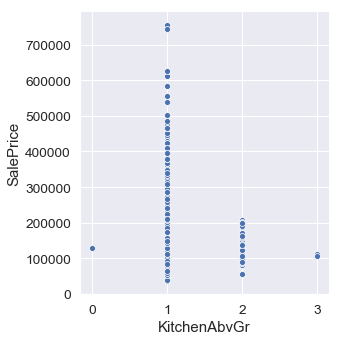

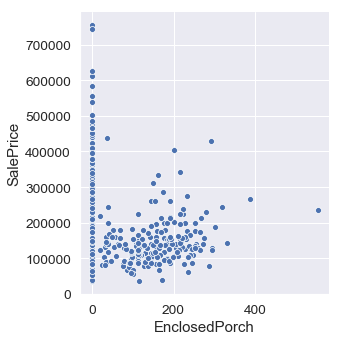

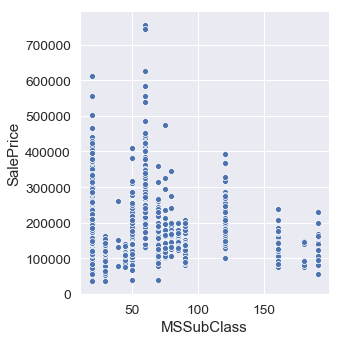

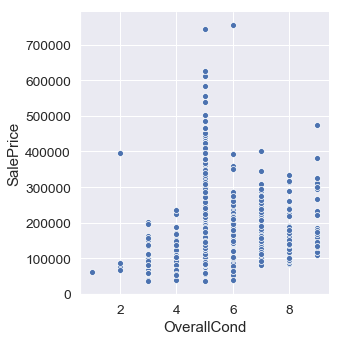

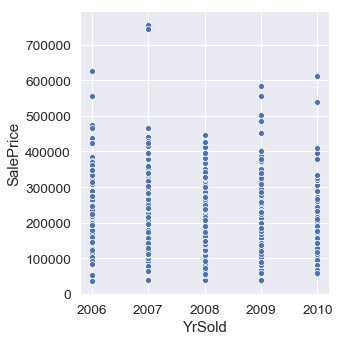

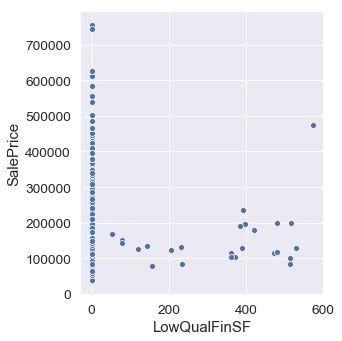

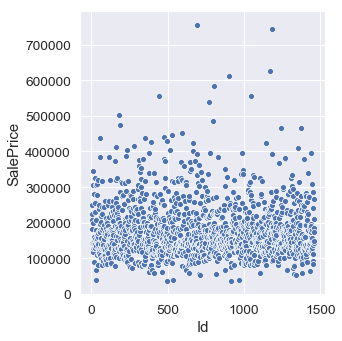

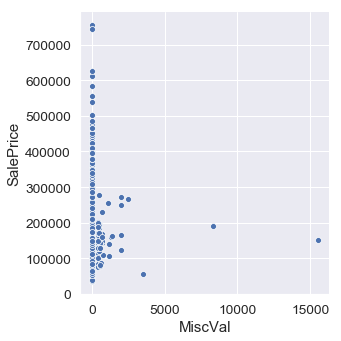

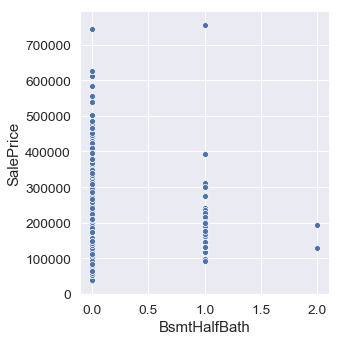

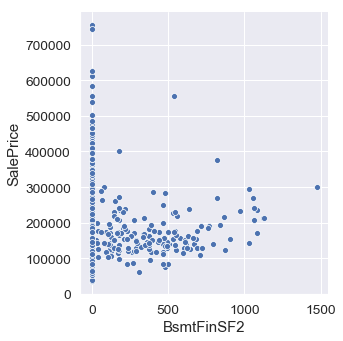

In [13]:
for cols in lowcorr_cols:
    plot_relplot(dataset_df,cols,target)

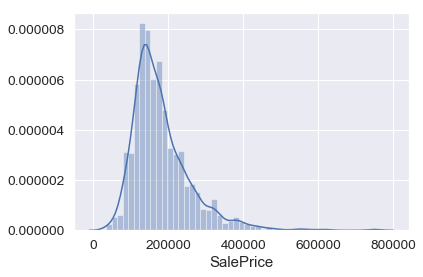

In [14]:


#Visualize target variable distribution
sns.distplot(dataset_df["SalePrice"])



Id


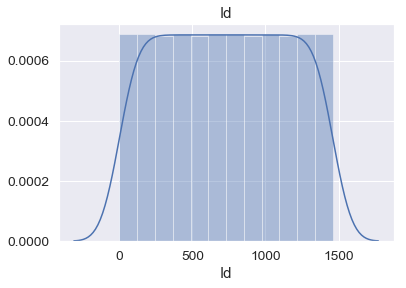

MSSubClass


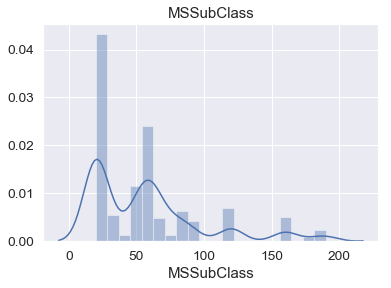

LotArea


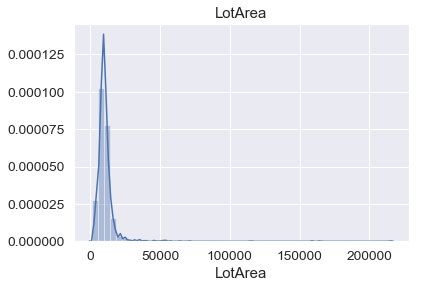

OverallQual


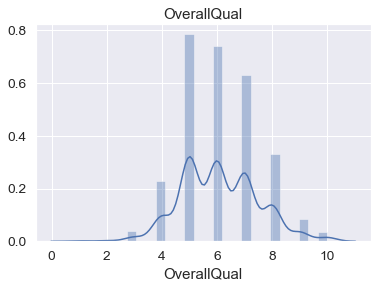

OverallCond


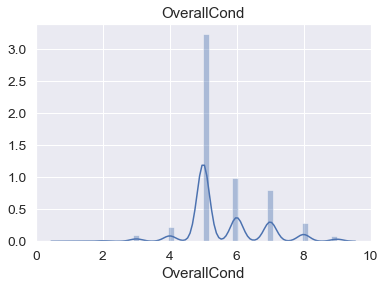

YearBuilt


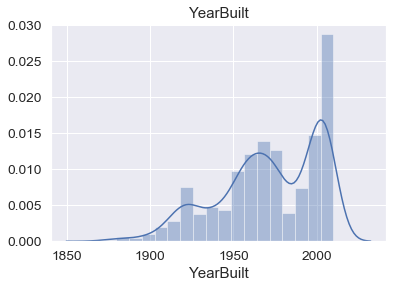

YearRemodAdd


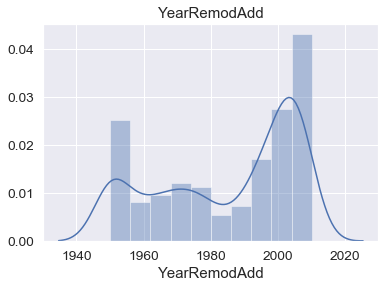

BsmtFinSF1


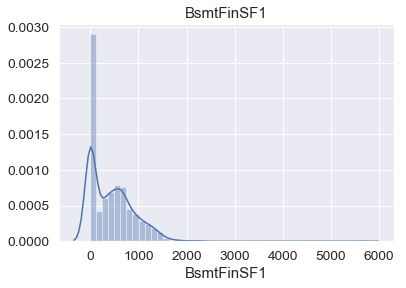

BsmtFinSF2


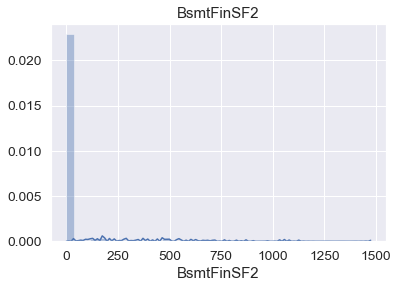

BsmtUnfSF


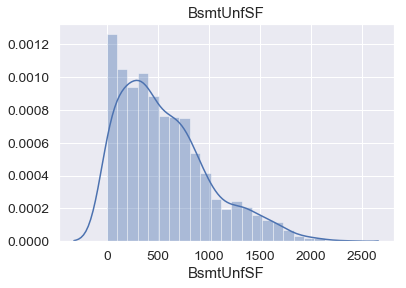

TotalBsmtSF


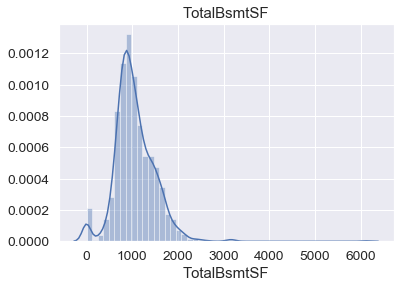

1stFlrSF


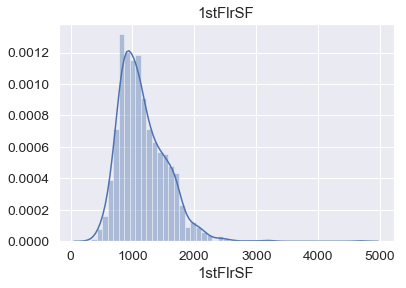

2ndFlrSF


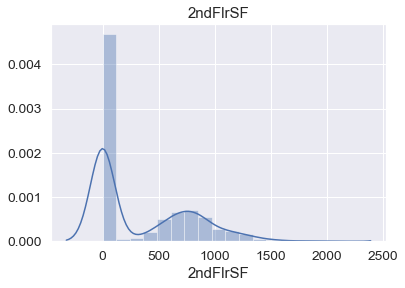

LowQualFinSF


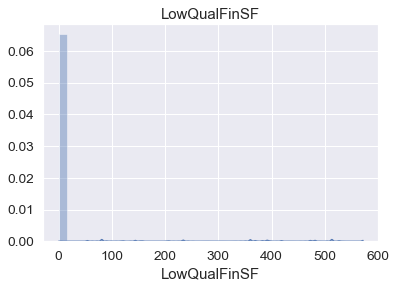

GrLivArea


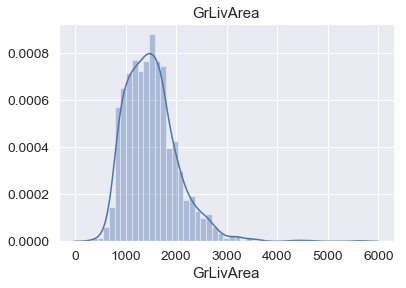

BsmtFullBath


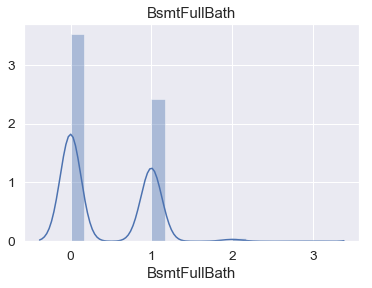

BsmtHalfBath


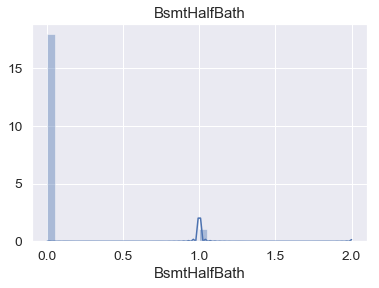

FullBath


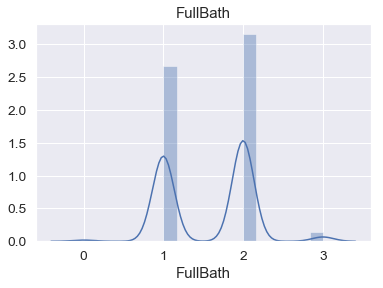

HalfBath


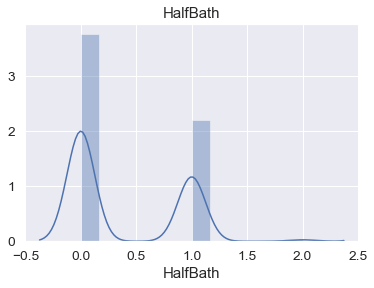

BedroomAbvGr


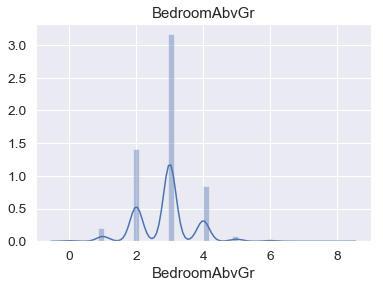

KitchenAbvGr


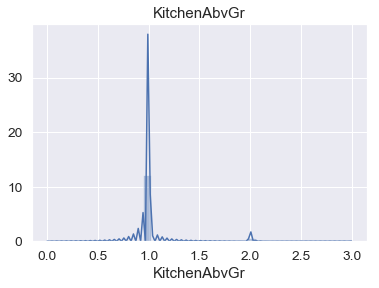

TotRmsAbvGrd


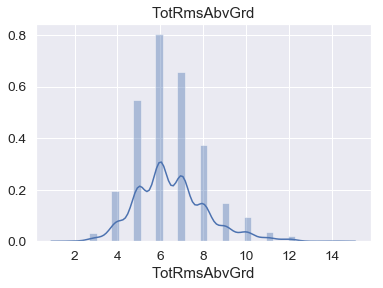

Fireplaces


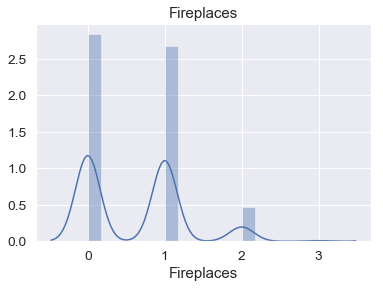

GarageCars


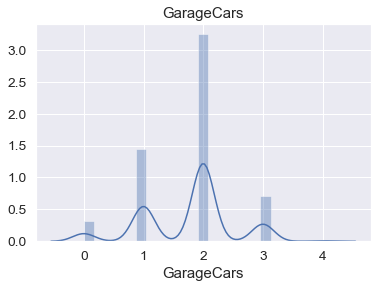

GarageArea


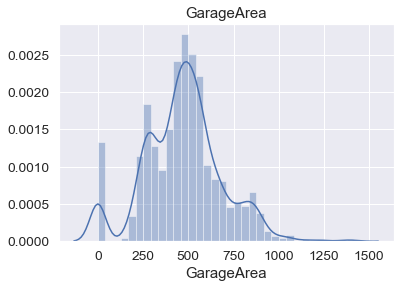

WoodDeckSF


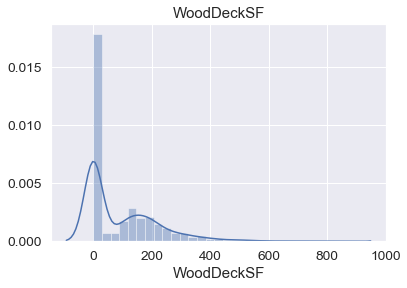

OpenPorchSF


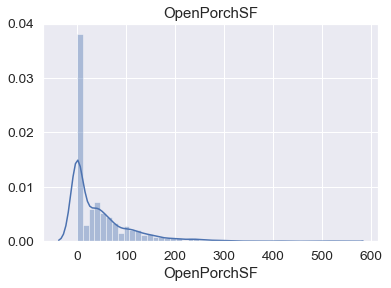

EnclosedPorch


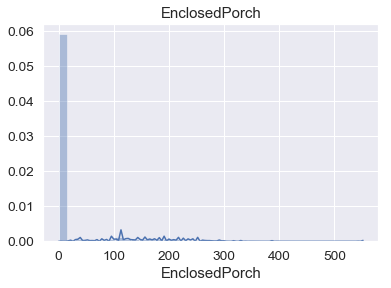

3SsnPorch


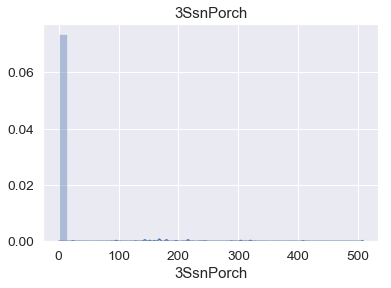

ScreenPorch


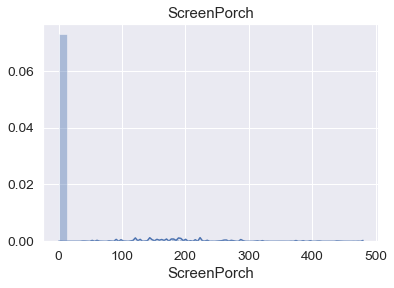

PoolArea


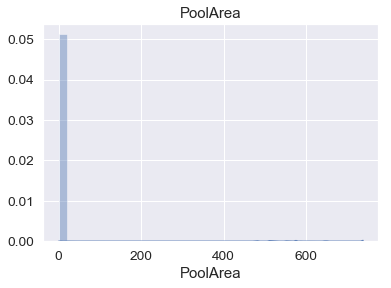

MiscVal


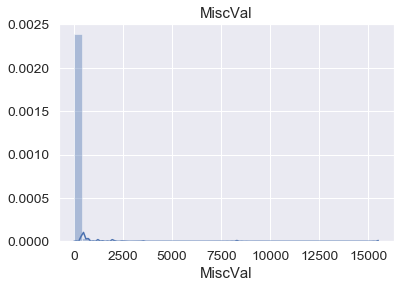

MoSold


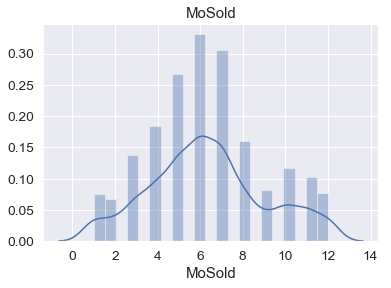

YrSold


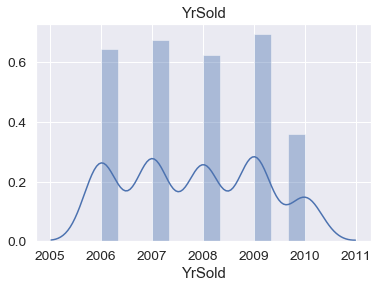

SalePrice


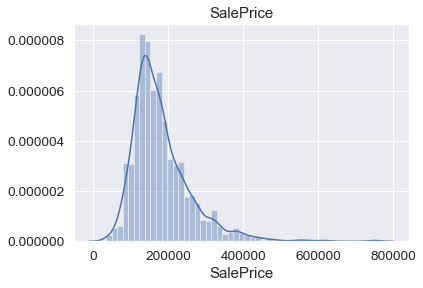

In [15]:
#plot histo of all numerical values
dp.plot_all_hist(dataset_df)

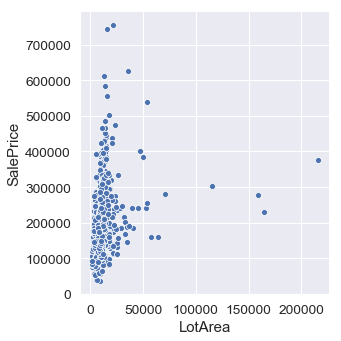

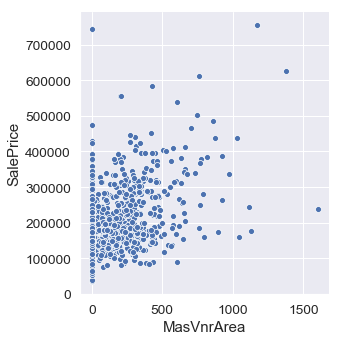

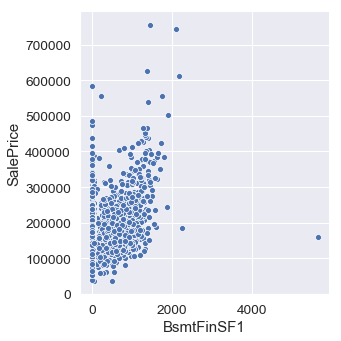

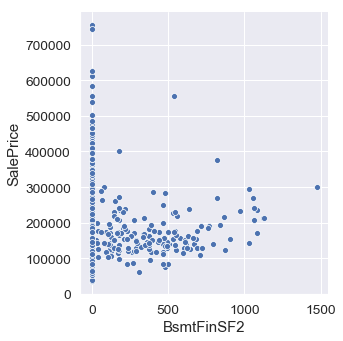

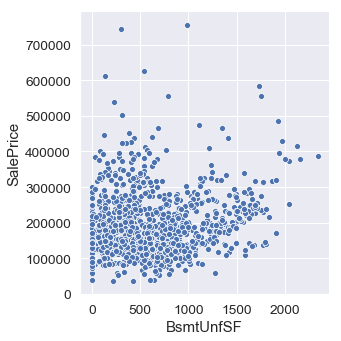

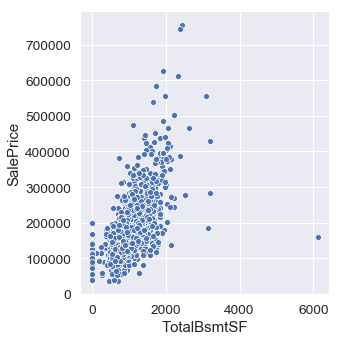

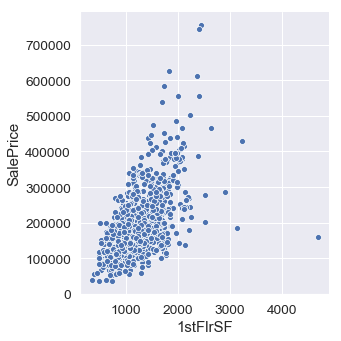

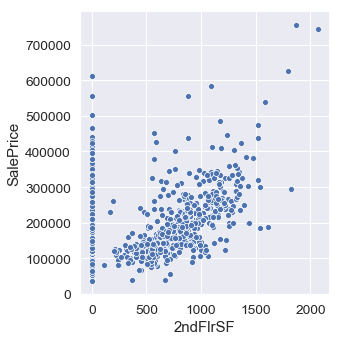

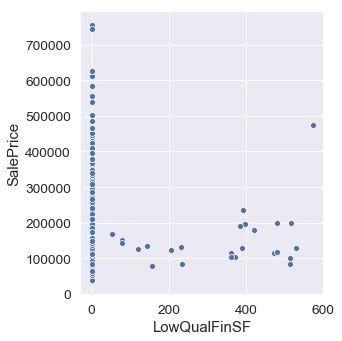

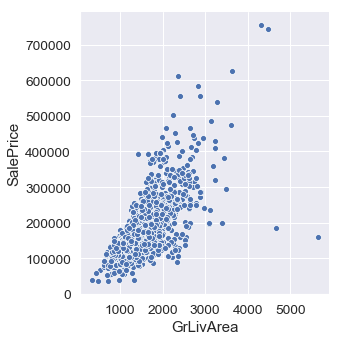

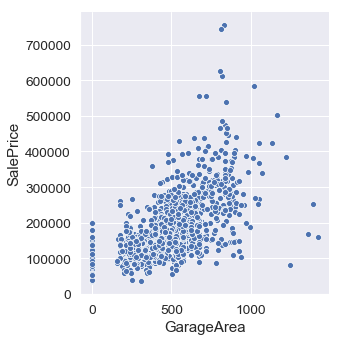

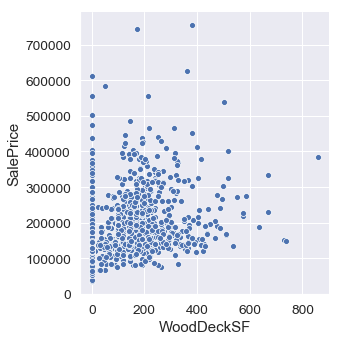

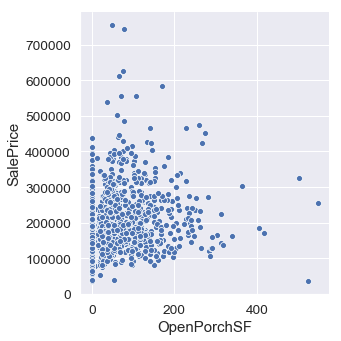

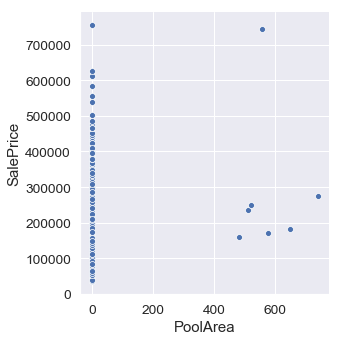

In [17]:
#Pattern for anything that is an area feature 
pattern = re.compile('.*(area|sf).*',re.I)
#Store all area columns/features here
area_cols = []

#List of all columns
col_list = list(dataset_df.columns)

#Iterate through df columns and plot vs target variable
for col in col_list:
   if (re.match(pattern,col)):
       area_cols.append(col)
       plot_relplot(dataset_df,col,'SalePrice')

C:\Users\takalyan\Documents\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\takalyan\Documents\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\takalyan\Documents\Anaconda\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\takalyan\Documents\Anaconda\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\takalyan\Documents\Anaconda\lib\site-packages\statsmodels\nonparametric\bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)


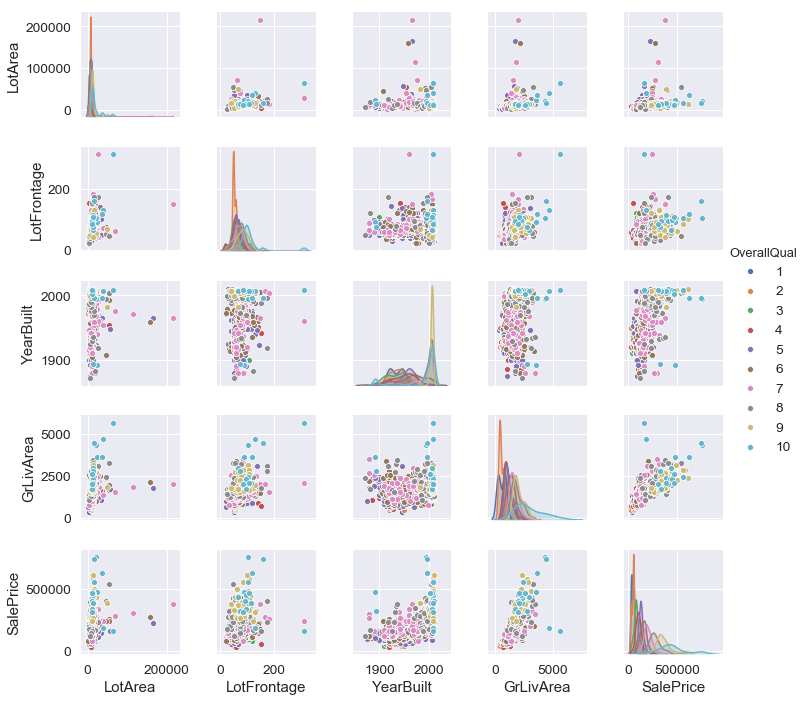

In [18]:
#Pairplots
sns.pairplot(dataset_df,height=2,hue='OverallQual', vars=[
  'LotArea',
 'LotFrontage',
 'YearBuilt',
 'GrLivArea',
 'SalePrice'])

In [19]:
#Printing quantiles
var = dataset_df.LotArea
var.describe()
print(var.quantile([.5,0.75,0.90,0.95,0.99,1]))

0.50      9478.50
0.75     11601.50
0.90     14381.70
0.95     17401.15
0.99     37567.64
1.00    215245.00
Name: LotArea, dtype: float64


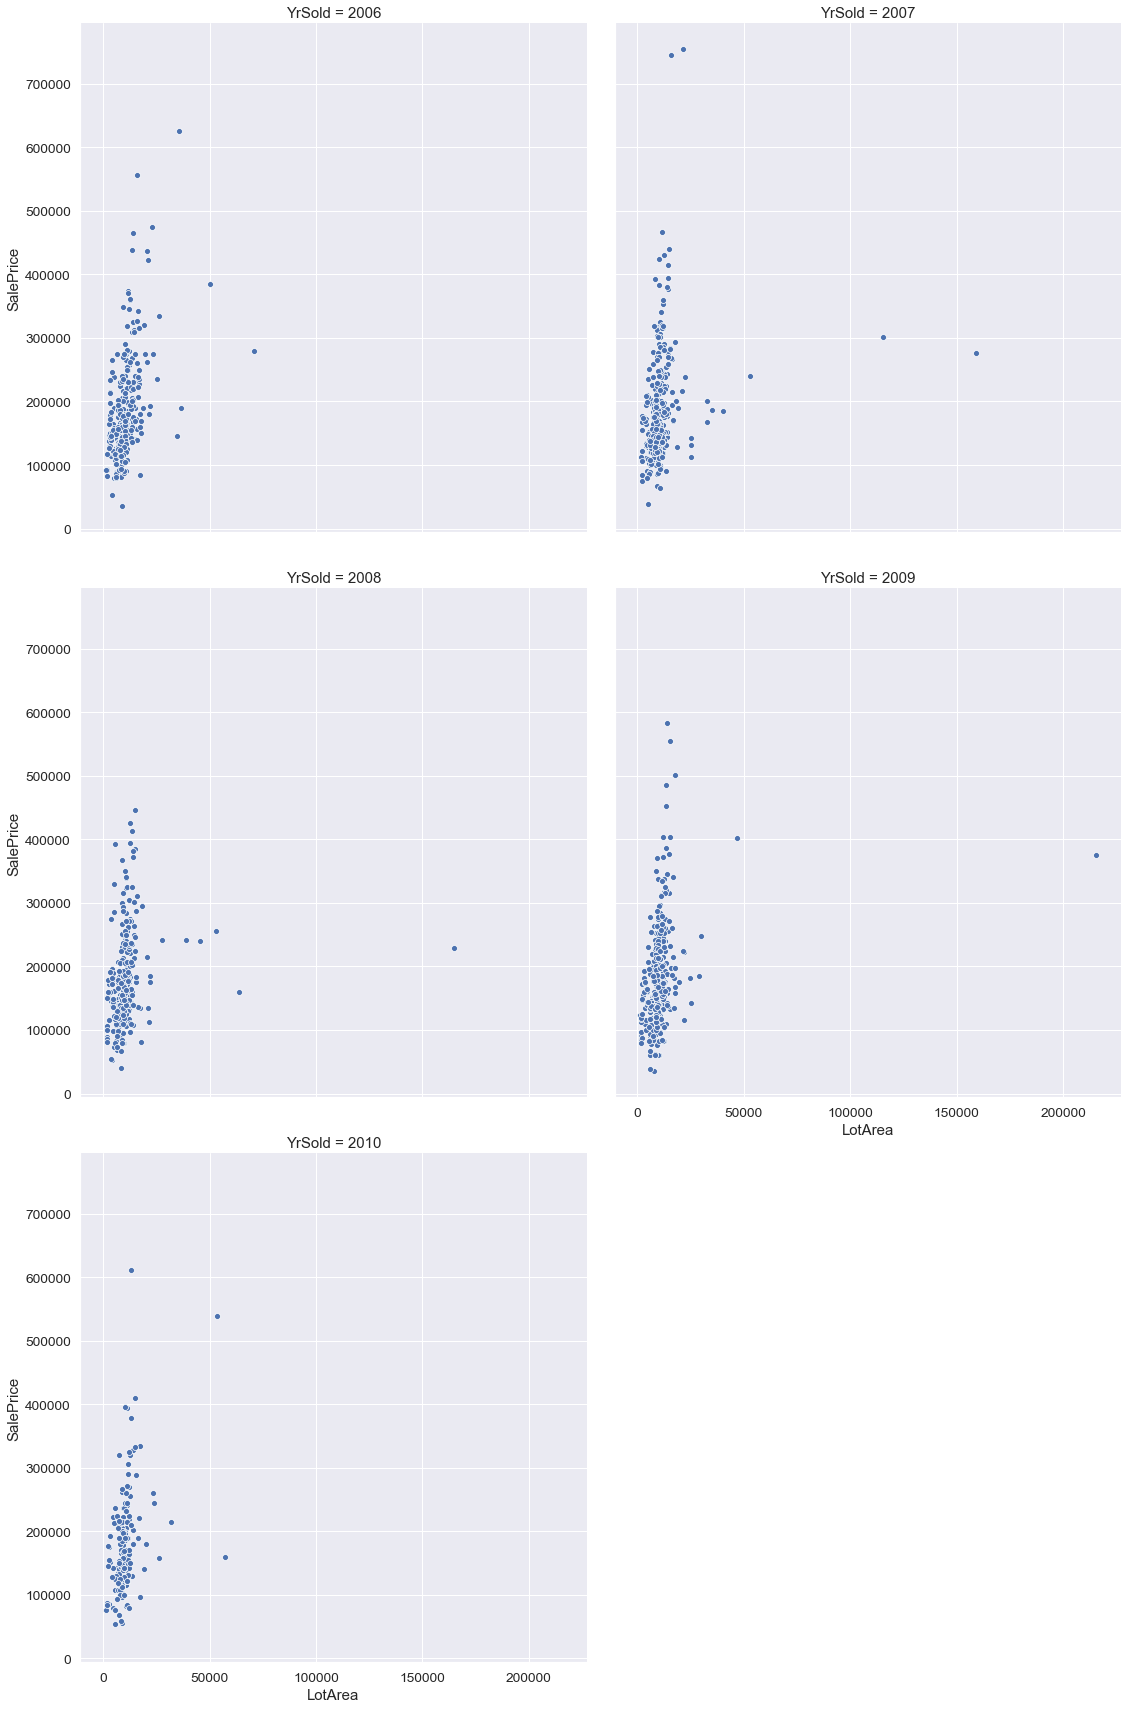

In [20]:
#Rel plots
sns.relplot(x='LotArea',y='SalePrice',
            col='YrSold', col_wrap=2,
            data=dataset_df,aspect=1,height=8,)


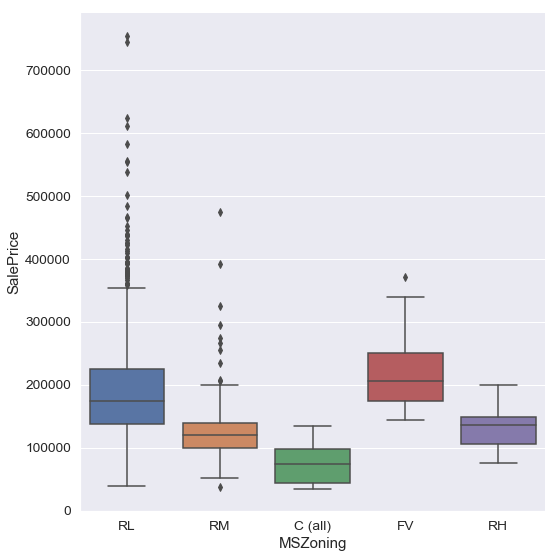

In [51]:
#Cat plots
sns.catplot(x='MSZoning',y='SalePrice', data=dataset_df,
            kind = 'box',height=8
            )

### Data Cleansing

We use this stage to cleanse the data - remove outliers, redundant columns, columns with low correlation or a large amount of missing values etc. We shall also encode categorical variables and impute missing values after the initial cleansing is done. 

In [10]:
#Create a copy of the original dataset
new_df = dataset_df.copy()

# Based on the description of the dataset, anything missing here is actually N/A 
# We should replace the values with "None" so that they are encoded  to a specific value
cols_to_mod = ['MSSubClass','MiscFeature','Alley','Fence','FireplaceQu','GarageType', 'GarageFinish',\
 'GarageQual','GarageCond','PoolQC','BsmtQual', 'BsmtCond', 'BsmtExposure',\
 'BsmtFinType1', 'BsmtFinType2','MasVnrType']

for col in cols_to_mod:
    new_df[col] = dataset_df[col].fillna("None")


# Based on the description of the dataset, anything missing here is actually N/A 
# We should replace the values with 0 so that they are encoded  to a specific value
cols_to_mod = ['MasVnrArea','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',\
                'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']

for col in cols_to_mod:
    new_df[col] = new_df[col].fillna(0)

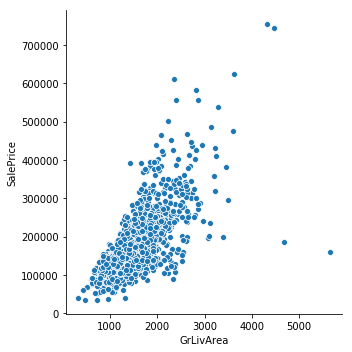

In [11]:
#Removing outliers for GrLivArea
plot_relplot(dataset_df,'GrLivArea','SalePrice')



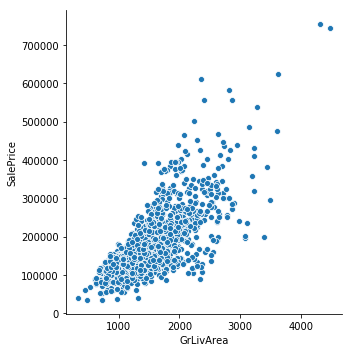

In [12]:
new_df = dataset_df.drop(dataset_df[(dataset_df['GrLivArea']>4000) & (dataset_df['SalePrice'] < 300000)].index)
plot_relplot(new_df,'GrLivArea','SalePrice')

In [13]:
#Drop features missing > 90% of trainset
dp.display_missing_colrows(dataset_df,0)




Columns with missing data:
          feature  miss count  miss ratio
72        PoolQC        1453    0.995205
74   MiscFeature        1406    0.963014
6          Alley        1369    0.937671
73         Fence        1179    0.807534
57   FireplaceQu         690    0.472603
3    LotFrontage         259    0.177397
58    GarageType          81    0.055479
59   GarageYrBlt          81    0.055479
60  GarageFinish          81    0.055479
63    GarageQual          81    0.055479
64    GarageCond          81    0.055479
32  BsmtExposure          38    0.026027
35  BsmtFinType2          38    0.026027
33  BsmtFinType1          37    0.025342
31      BsmtCond          37    0.025342
30      BsmtQual          37    0.025342
26    MasVnrArea           8    0.005479
25    MasVnrType           8    0.005479
42    Electrical           1    0.000685


In [14]:
cols_to_drop = ['Alley','MiscFeature','PoolQC']
new_df = dataset_df.drop(cols_to_drop,axis=1)

#Drop low correlation vars
lowcorr_cols = ['YrSold',  'Id', 'MiscVal', 'BsmtHalfBath']
#Drop low correlation vars
new_df = new_df.drop(lowcorr_cols,axis=1)


#Drop redundant, duplicate features
new_df = new_df.drop(cols_to_remove,axis=1)


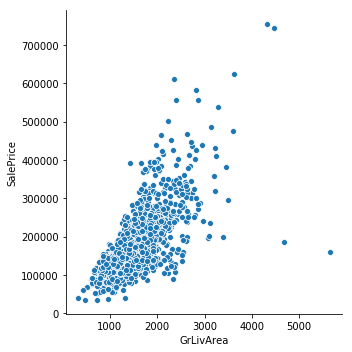

In [19]:
area_cols = ['LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF']

col_list = area_cols


#Remove outliers using quantile values
#col_list = ['GrLivArea','LotArea']

plot_relplot(dataset_df,'GrLivArea','SalePrice')


Removing outliers greater than 17400.51500000001 for LotArea

Removing outliers greater than 435.01800000000026 for MasVnrArea

Removing outliers greater than 1237.0630000000006 for BsmtFinSF1

Removing outliers greater than 1489.056000000001 for BsmtUnfSF

Removing outliers greater than 1700.0360000000005 for 1stFlrSF

Removing outliers greater than 1103.0800000000008 for 2ndFlrSF

Removing outliers greater than 2210.1540000000014 for GrLivArea

Removing outliers greater than 779.0840000000004 for GarageArea

Removing outliers greater than 342.0260000000003 for WoodDeckSF

Removing outliers greater than 172.0 for OpenPorchSF



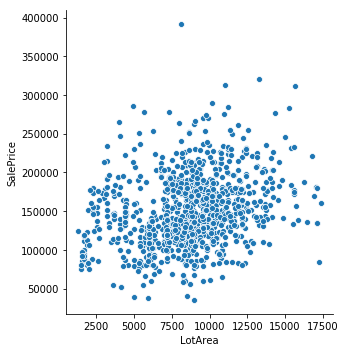

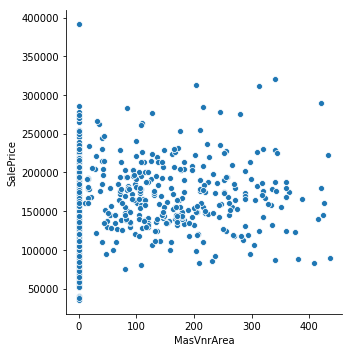

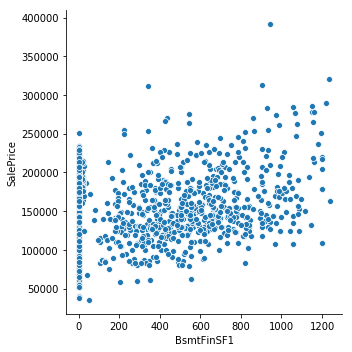

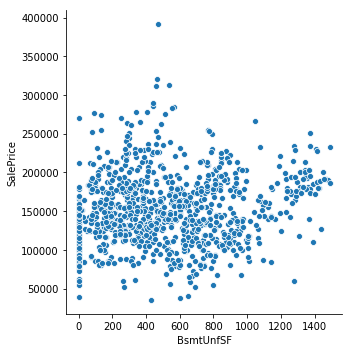

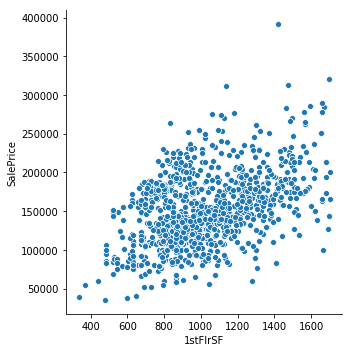

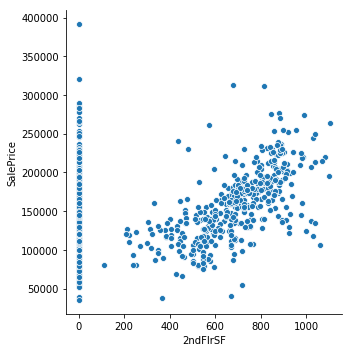

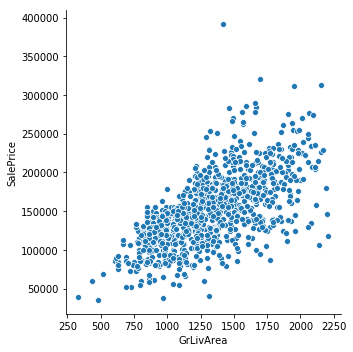

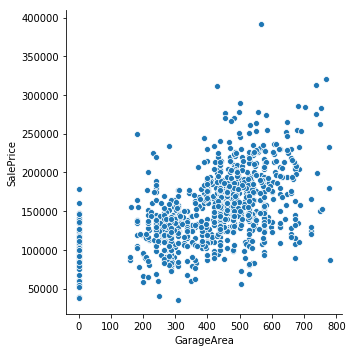

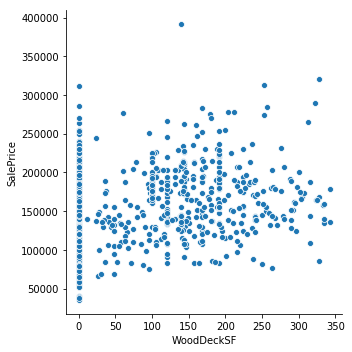

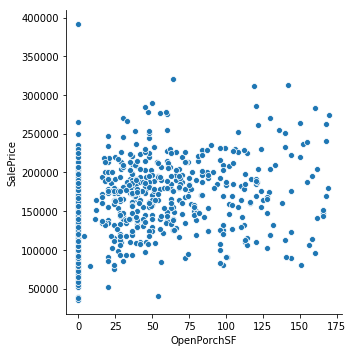

In [22]:
#Remove values greater than 99% of quantile values
new_df = dp.remove_outliers_quant(new_df,col_list,0.99)

for col in col_list:
    plot_relplot(new_df,col,'SalePrice')

In [17]:
#Encode categorical variables
encoder, new_df  = dp.encode_df(new_df,'label')

#impute missing 
new_df = dp.impute_missing_mean(new_df)

### Feature Engineering

Coming up with new features that will help us make better predictions. 

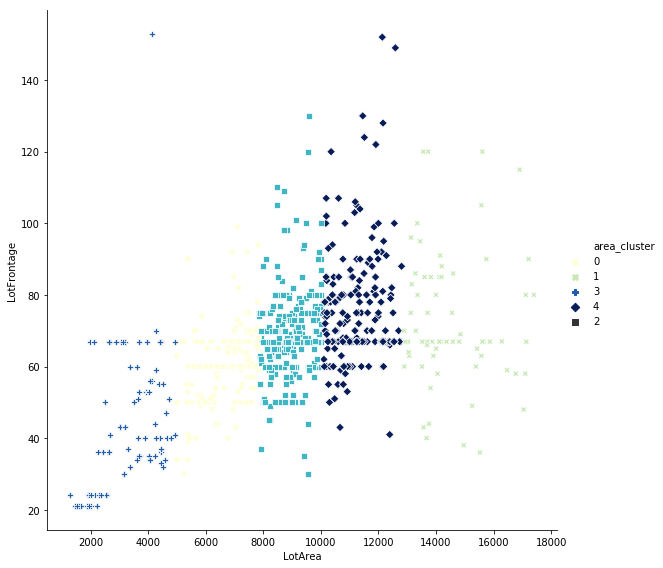

In [23]:
#Add a new column for clusters based on the area

#Create a 2D array required for Kmeans clustering
lotArea_array = np.array(new_df["LotArea"]).reshape(-1,1)
#Use Kmeans with 5 groups for clustering data
kmeans = MiniBatchKMeans(n_clusters=5, batch_size=32).fit(lotArea_array)

#Assign new feature based on cluster
new_df['area_cluster'] = kmeans.predict(lotArea_array)

#Plot the clusters
sns.relplot(x='LotArea',y='LotFrontage',data=new_df,
            hue='area_cluster',style='area_cluster',height=8,
            palette='YlGnBu')


In [39]:
####################
# Save data
####################

#Save clean data to csv
#Random shuffle
new_df = new_df.sample(frac=1).reset_index(drop=True)

#Define train and test set
test_pct = 0.2
test_row_count = np.int(test_pct * new_df.shape[0])
train_row_count = new_df.shape[0] - test_row_count

#Create train and validation dataframe and dump to csv
train_df = new_df.loc[0:train_row_count-1,:]
test_df =  new_df.loc[train_row_count:,:]

train_df.to_csv('new_train.csv',index=False)
test_df.to_csv('new_test.csv',index=False)

pickle.dump(kmeans,open ('cluster_model.pickle','wb'))
pickle.dump(encoder,open('encoder.pickle','wb'))